# Two Sample T-Test - Lab

## Introduction

The two-sample t-test  is used to determine if two population means are equal. A common application is to test if a new process or treatment is superior to a current process or treatment.

## Objectives
You will be able to:
* Understand the t-statistic, p-value, and t-test for 2 sample t-test
* Calculate the t-statistic and p-value using formulas as well as Scipy functions
* Visually represent the t-test and p-value using the t-distribution
* Understand how the t-test and frequentist hypothesis testing relate to the concepts of signal and noise


## Example: 

Consider the following experimental settings for clinical trials of a new blood pressure medicine. 

In the context of controlled experiments, we often talk about the "control" group and the "experimental" or "treatment" group. In our drug example, the control group is the group given the placebo and the treatment group is given the actual drug. We are interested in the average difference in blood pressure levels between the treatment and control groups.


>The 50 subjects in the control group have an average systolic blood pressure of 121.38 who have been given a placebo drug.

>The 50 subjects in the experimental / treatment group have an average systolic blood pressure of 111.56 after treatment with drug under test. 

The apparent difference between experimental and control groups is -9.82 points. But with 50 subjects in each group, how confident can we be that this measured difference is real? We can perform what is known as a t-test to evaluate this.

First we will calculate a t-statistic for 2 sample t-test, followed by calculation of p-value. 

We can set up the experimental and control observations below as numpy arrays. let's first import necessary libraries

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Use this sample data to conduct experimentation

control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])


It is always a good idea to draw the probability distributions for samples to visually inspect the differences between and standard deviation. 
Let's plot both samples' distributions and inspect the overlap. 

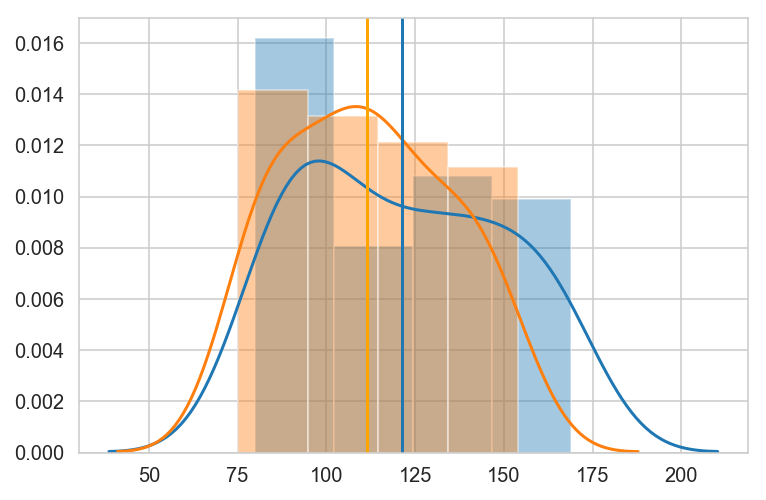

In [8]:
# Draw a plot showing overlapping of distribution means and sds for incpection
sns.distplot(control)
sns.distplot(experimental)
plt.axvline(control.mean())
plt.axvline(experimental.mean(), c='orange')

So we are able to see some slight differences in the mean and standard deviation od control and experimental groups. This is a good sign to further our experimentation and to calculate whether the difference is significant, or not. 

## The Null Hypothesis

In our drug efficacy experiment example, we can define our null hypothesis to be that there is no difference between a subject taking a placebo and and the treatment drug.

>**Ho: The mean difference between treatment and control groups is zero. i.e. Ho = Ha**

## The Alternate Hypothesis

The alternate hypothesis is the outcome of the experiment that we hope to show. In our example the alternative hypothesis is that there is in fact a mean difference in blood pressure between the treatment and control groups.

>**H1 (2-tailed): The parameter of interest, our mean difference between treatment and control, is different than zero.**

>**H1 (1-tailed, >): The parameter of interest, our mean difference between treatment and control, is greater than zero.**

>**H1 (1-tailed, <): The parameter of interest, our mean difference between treatment and control, is less than zero.**

NOTE: The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the parameter of the overall population. Through the process of experimentation / hypothesis testing and statistical analysis of the results we will make an inference about this population parameter.

First we need to calculate the mean difference between bpoth groups.

In [9]:
# Calculate difference between distribution means
control_mean = control.mean()
experimental_mean = experimental.mean()
mean_difference = experimental_mean - control_mean
print('the difference in means is: ', round(mean_difference,3))

# -9.819999999999993

the difference in means is:  -9.82


What is the probability that we observed this data GIVEN a specified mean difference in blood pressure.

We obviously don't know the true mean difference in blood pressure resulting from the drug. The whole point of conducting the experiment is to evaluate the drug. Instead we will assume that the true mean difference is zero: the null hypothesis H0 is assumed to be true:

## Calculating the t-statistic
When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

![](https://www.statsdirect.co.uk/help/generatedimages/equations/equation167.svg)

## Calculating sample variance
The $s^2$ denotes our sample variance. In this version of the t-test we are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but in our case it is a reasonable assumption.

This approach combines the variance of the two group's variance measurements into a single, pooled metric.

Let's create some functions to calculate the t-statistic. 

Write a function to calculate a sample variance. i.e. 
> $∑i=1-n((sample(i) - mean(sample))^2 $

where n is the number of samples

In [12]:
def variance(sample):
    sample_mean = np.mean(sample)
    v = sum([(i - sample_mean)**2 for i in sample])
    print("variance: ", round(v, 2))
    return v

Using above function, we can now write another function to calculate $S2$

In [13]:
def sample_variance(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    var1, var2 = variance(sample1), variance(sample2)
    s_variance = (var1 + var2) / ((n1 + n2)-2)
    print("sample variance: ", round(s_variance, 2))
    return s_variance

Now that we have S2, we can easily calculate the two sample t-statistic using the formula goven earlier. 

In [14]:
def twosample_tstatistic(expr, ctrl):
    exp_mean = np.mean(expr)
    ctrl_mean = np.mean(ctrl)
    samp_var = sample_variance(expr, ctrl)
    ne, nc = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(samp_var * ((1/ne) + (1/nc)))
    tstat = num/denom
    return tstat

t_stat = twosample_tstatistic(experimental, control)
print("t stat: ", round(t_stat, 4))
# -1.8915462966190268

variance:  26538.32
variance:  39493.78
sample variance:  673.8
t stat:  -1.8915


Using the data we have upto this point, we can visualize the t-statistic with t-statistic and calculate the area under curve to calculate our p-value. 

Let's write a function that ingests the calculated t-statistic, control and experimental group lengths to identify critical boundaries. 

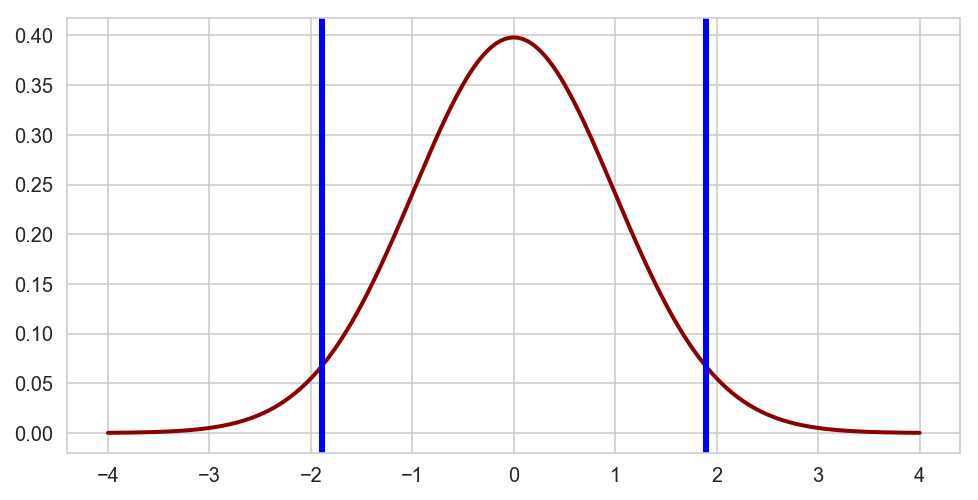

In [19]:
# Visualize t and p_value

def visualize_t(t_stat, n_control, n_experimental):
    
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4,4,500)
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ys = stats.t.pdf(xs, (n_control+n_experimental - 2), 0, 1)
    
    ax.plot(xs, ys, linewidth=2, color='darkred')
    
    ax.axvline(t_stat, color='blue', lw=3)
    ax.axvline(-t_stat, color='blue', lw=3)
    
    plt.show()
    return None

n_control = len(control)
n_experimental = len(experimental)
visualize_t(t_stat, n_control, n_experimental)

In [ ]:
# Visualize p_value

def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib "figure"

    # generate points on the x axis between -4 and 4:
 
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    # Draw two sided boundary for critical-t

    return None

n_control = len(control)
n_experimental = len(experimental)
visualize_t(t_stat, n_control, n_experimental)

Now that we have defined our boundaries for significance, we can simply calculate p_value by calculating the total area under curve using `stats.t.cdf()`. 

Given a t-value and a degrees of freedom, you can use the "survival function" sf of scipy.stats.t (aka the complementary CDF) to compute the one-sided p-value. For the two-sided p-value, just double the one-sided p-value.

In [20]:
## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-1.89, (50+50-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(1.89, (50+50-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.061713104303855494


To verify our results, we can use SciPy's functions to calculate the p_value in a one liner. 

In [21]:
stats.t.sf(abs(t_stat), len(experimental)+len(control)-1) * 2

0.06147434803316479

In [ ]:
'''
Calculates the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.
'''

stats.ttest_ind(experimental, control)

## Summary
In this lesson, we ran hypothesis testing using frequestists methods with t-values and p-values. We saw how a twoe sample t-test can be applied to contexts where the population and sample mean are known and we have limited amount of sample data. We looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also highlight SciPy functions that can be used to calculate test statistics and p-value as a way to verify the calculation performed during the lesson. 